In [1]:
import random
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np 
#PCA: Data plotting
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#data load
wdir = 'AOP_data/'
csv = '5-alpha-reductase-maccs.csv'

df = pd.read_csv(wdir+csv)
df = df.dropna(axis=0)
y = df['Standard Value']
x = df.drop(['Molecule', 'Standard Value'], axis=1)

#hyperparam
test_size = 0.1
kernel = 'poly' #if you want, you can try other kernels like 'linear','rbf'
cv = 5

#data split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = test_size)

#model fit
svr = SVR(kernel=kernel, gamma='auto')
svr.fit(x_train,y_train)

#metric
mse = cross_val_score(svr, 
                        x_train, 
                        y_train, 
                        scoring='neg_mean_squared_error',  
                        cv=cv )
mse *= -1
rmse  = np.sqrt(mse)

print('{} SVR RMSE : '.format(kernel), rmse)
print('{} SVR RMSE.mean : '.format(kernel) , np.sum(rmse)/cv)



poly SVR RMSE :  [ 2519.57806407  2287.69467455 20155.73973467  2094.15034676
  1986.3983337 ]
poly SVR RMSE.mean :  5808.7122307510745


[0.5, 0.6, 0.9, 0.91, 1.6, 1.7, 1.7, 1.7, 1.77, 2.0, 2.11, 2.19, 2.35, 2.4, 2.42, 2.5, 2.6, 2.6, 2.7, 2.93, 3.05, 3.22, 3.3, 3.3, 3.31, 3.4, 4.3, 4.56, 5.0, 5.08, 5.44, 5.6, 5.6, 5.63, 5.7, 5.8, 5.8, 6.0, 6.8, 7.25, 7.31, 7.9, 7.943, 8.0, 8.1, 8.1, 8.128, 8.4, 8.5, 8.6, 8.6, 8.71, 9.5, 9.5, 9.53, 9.57, 10.0, 10.5, 10.6, 11.0, 11.0, 11.2, 11.8, 11.9, 12.5, 12.9, 14.0, 14.0, 14.0, 14.0, 14.4, 14.4, 14.5, 15.6, 15.8, 16.9, 17.0, 17.0, 17.2, 17.2, 18.2, 19.0, 19.0, 19.1, 19.1, 19.95, 20.0, 20.0, 20.0, 20.5, 20.9, 21.0, 21.38, 22.5, 23.0, 24.6, 25.0, 26.0, 26.0, 29.0, 30.3, 32.0, 32.36, 32.36, 32.36, 32.8, 34.67, 34.67, 34.9, 35.0, 38.0, 38.3, 40.0, 42.0, 42.0, 50.0, 52.0, 58.0, 59.0, 59.8, 60.0, 60.0, 60.26, 62.0, 63.0, 74.0, 75.0, 79.43, 79.43, 83.7, 89.13, 92.9, 93.0, 93.33, 94.0, 97.72, 100.0, 100.0, 102.0, 107.0, 112.2, 114.82, 114.82, 116.0, 117.49, 120.0, 120.0, 120.0, 120.0, 120.2, 120.2, 127.0, 127.0, 128.82, 129.0, 130.0, 130.0, 131.83, 134.0, 134.0, 137.0, 138.0, 141.0, 147.91, 1

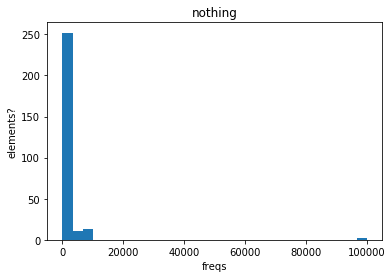

In [2]:
ylist = y.values.tolist()
ylist.sort()
print(ylist)
fig, ax = plt.subplots()
# the histogram of the data
n, bins, patches = ax.hist(ylist, bins=30)#, , width = 0.9
# print(n)
ax.set_xlabel('freqs')
ax.set_ylabel('elements?')
ax.set_title(r'nothing')

# plt.xlim(0, 10)
# plt.ylim(0, 300)

plt.show()

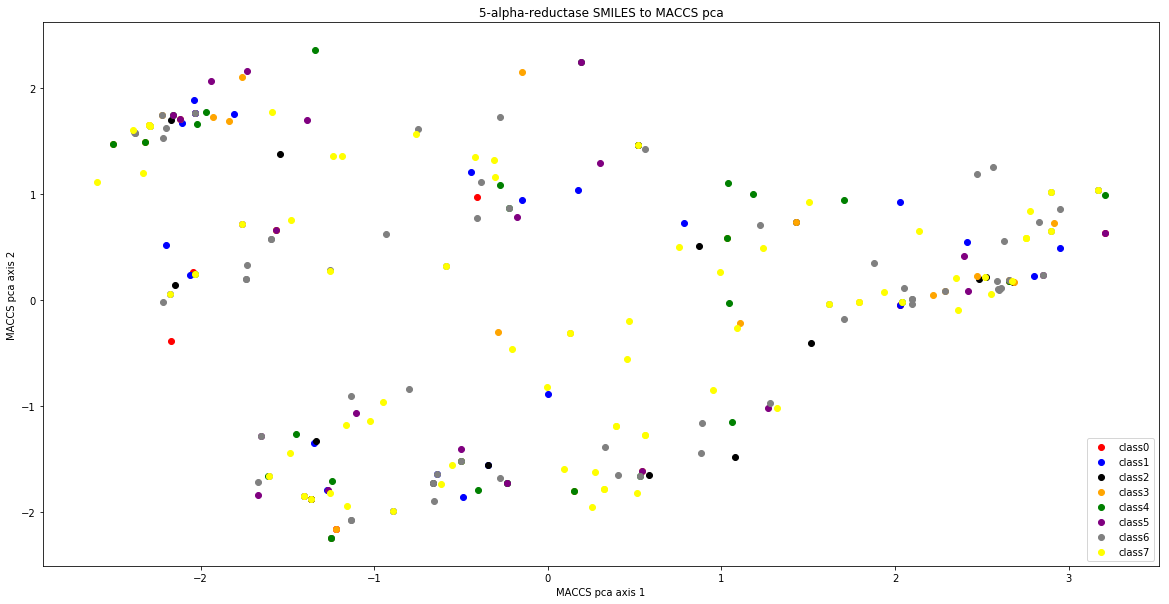

In [3]:



#df_id = df[['Standard Value']]

pca = PCA(n_components = 2).fit(x)
fp_pca = pca.transform(x)
fp_pca_df = pd.DataFrame(fp_pca, columns=['pca1','pca2'])
df_label_pca = pd.concat([y, fp_pca_df], axis=1)

fig, ax = plt.subplots(figsize=(20, 10)) 

class0 = df_label_pca[df_label_pca['Standard Value'].between(-1, 2)]
class1 = df_label_pca[df_label_pca['Standard Value'].between(2, 6)]
class2 = df_label_pca[df_label_pca['Standard Value'].between(6, 10)]
class3 = df_label_pca[df_label_pca['Standard Value'].between(10, 20)]
class4 = df_label_pca[df_label_pca['Standard Value'].between(20, 50)]
class5 = df_label_pca[df_label_pca['Standard Value'].between(50, 100)]
class6 = df_label_pca[df_label_pca['Standard Value'].between(100, 500)]
class7 = df_label_pca[df_label_pca['Standard Value'] > 500]

plt.scatter(class0['pca1'],class0['pca2'],c='red',label='class0')
plt.scatter(class1['pca1'],class1['pca2'],c='blue',label='class1')
plt.scatter(class2['pca1'],class2['pca2'],c='black',label='class2')
plt.scatter(class3['pca1'],class3['pca2'],c='orange',label='class3')
plt.scatter(class4['pca1'],class4['pca2'],c='green',label='class4')
plt.scatter(class5['pca1'],class5['pca2'],c='purple',label='class5')
plt.scatter(class6['pca1'],class6['pca2'],c='grey',label='class6')
plt.scatter(class7['pca1'],class7['pca2'],c='yellow',label='class7')
plt.title('5-alpha-reductase SMILES to MACCS pca')
plt.xlabel('MACCS pca axis 1')
plt.ylabel('MACCS pca axis 2')
plt.legend(loc=4)

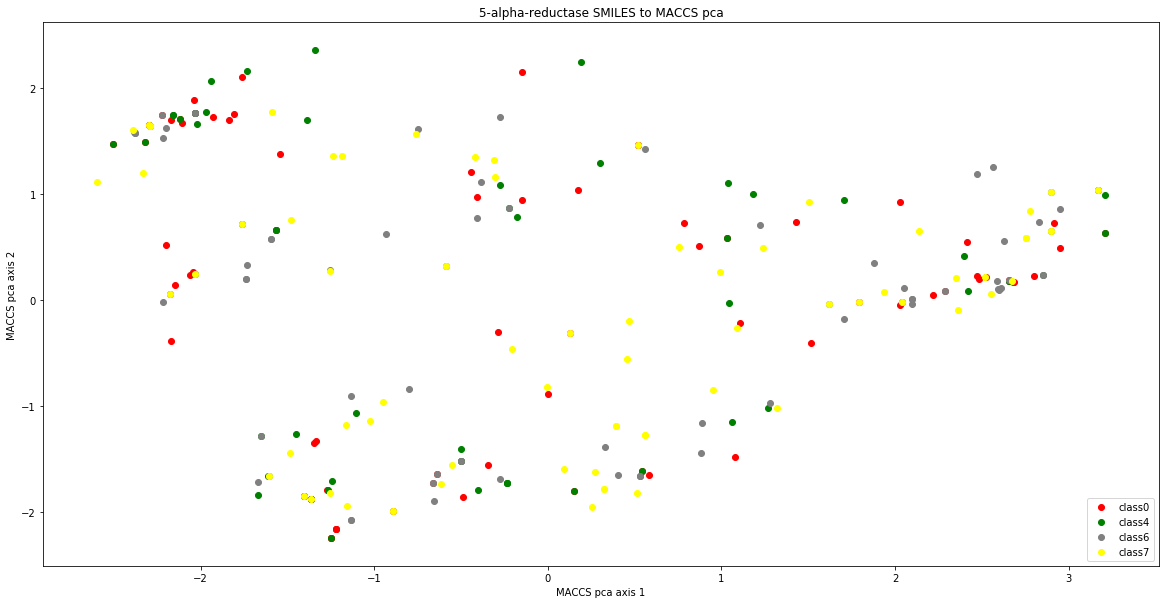

In [4]:
fig, ax = plt.subplots(figsize=(20, 10)) 

class0 = df_label_pca[df_label_pca['Standard Value'].between(-1, 20)]
class4 = df_label_pca[df_label_pca['Standard Value'].between(20, 100)]
class6 = df_label_pca[df_label_pca['Standard Value'].between(100, 500)]
class7 = df_label_pca[df_label_pca['Standard Value'] > 500]

plt.scatter(class0['pca1'],class0['pca2'],c='red',label='class0')
#plt.scatter(class1['pca1'],class1['pca2'],c='blue',label='class1')
#plt.scatter(class2['pca1'],class2['pca2'],c='black',label='class2')
#plt.scatter(class3['pca1'],class3['pca2'],c='orange',label='class3')
plt.scatter(class4['pca1'],class4['pca2'],c='green',label='class4')
#plt.scatter(class5['pca1'],class5['pca2'],c='yellow',label='class5')
plt.scatter(class6['pca1'],class6['pca2'],c='grey',label='class6')
plt.scatter(class7['pca1'],class7['pca2'],c='yellow',label='class7')
plt.title('5-alpha-reductase SMILES to MACCS pca')
plt.xlabel('MACCS pca axis 1')
plt.ylabel('MACCS pca axis 2')
plt.legend(loc=4)